In [3]:
import sqlite3 as sql
import pandas as pd
import datetime
import csv

In [2]:
conn = sql.connect('Data.sqlite')
fire = pd.read_sql('SELECT * FROM Fires', conn)

In [3]:
type(fire)

pandas.core.frame.DataFrame

In [4]:
fire.shape

(892007, 39)

In [6]:
fire.head(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...
6,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.688333,-120.153333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...
7,8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4\x9b^\...
8,9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""\x92^\..."
9,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.548333,-120.149167,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\t^\xc0\...


In [45]:
fire["DISCOVERY_DATE"].count()

1880465

In [49]:
fire["CONT_DATE"].count()

988934

In [7]:
fire["FIRE_SIZE"].min()

1e-05

In [3]:
fire.dropna(subset=["DISCOVERY_DATE", "DISCOVERY_TIME","CONT_DATE","CONT_TIME"],inplace=True)

In [4]:
def jd2cal(jd_val):
    # print(jd_val)
    mjd_val = int(jd_val-2400000.5)
    #print(mjd_val)
    start_time = datetime.date(1858, 11, 17)
    end_date = start_time + datetime.timedelta(days=mjd_val)
    return end_date.strftime("%m/%d/%Y")
    

In [5]:
import numpy as np
import haversine as hs

fire.head()
df = pd.DataFrame()

print(min(fire["LATITUDE"]))
print(max(fire["LATITUDE"]))
print(min(fire["LONGITUDE"]))
print(max(fire["LONGITUDE"]))

bottomLeft = (min(fire["LATITUDE"]), min(fire["LONGITUDE"]))
bottomRight = (min(fire["LATITUDE"]), max(fire["LONGITUDE"]))
topLeft = (max(fire["LATITUDE"]), min(fire["LONGITUDE"]))
topRight = (max(fire["LATITUDE"]), max(fire["LONGITUDE"]))

length = hs.haversine(bottomLeft,bottomRight)
width = hs.haversine(bottomLeft,topLeft)
print(length)
print(width)

cols = np.linspace(bottomLeft[1], bottomRight[1], num=600)
rows = np.linspace(bottomLeft[0], topLeft[0], num=300)
#cols = [round(num,8) for num in cols]
#rows = [round(num,8) for num in rows]

df_cols = np.searchsorted(cols, fire["LONGITUDE"])
df_row = np.searchsorted(rows, fire["LATITUDE"])

col = [str('%.4f'%round(int,4)) for int in cols[df_cols]]
row = [str('%.4f'%round(int,4)) for int in rows[df_row]]

temp = []
for index,val in enumerate(col):
    temp.append(col[index]+','+row[index])

df["LONGITUDE"] = fire["LONGITUDE"]
df["LATITUDE"] = fire["LATITUDE"]
df["LONG/LAT"] = temp
df["DISCOVERY_DATE"] = fire["DISCOVERY_DATE"]
df["DISCOVERY_TIME"] = fire["DISCOVERY_TIME"]
df["CONT_DATE"] = fire["CONT_DATE"]
df["CONT_TIME"] = fire["CONT_TIME"]
df["FIRE_SIZE"] = fire["FIRE_SIZE"]
#df["STAT_CAUSE_DESCR"] = fire["STAT_CAUSE_DESCR"]
#df["LONG"] = cols[df_cols]
#df["LAT"] = rows[df_row]
#df = df.sort_values(by=["LONG","LAT"])

df.to_csv('Data_with_category.csv')

17.93972222
70.3306
-168.87
-65.25694444
10762.116332162086
5825.607858252318


In [6]:
gk = df.groupby("LONG/LAT")

In [7]:
LL_list = df["LONG/LAT"].unique()
LL_list = LL_list.tolist()
print(len(LL_list))

23798


In [8]:
Dataset_list = []
Data_csv_list = []
for LL in LL_list:
    temp_list = [None]*4
    LL_df = gk.get_group(LL)
    # if(len(LL_df) > 3):
    #     LL_df = LL_df.sample(3)
    LL_df = LL_df.sort_values(by=["DISCOVERY_DATE"],ascending=False)
    LL_df = LL_df.head(1)
    Dataset_list.append(LL_df)
    temp_list[0] = LL.split(',')[0]
    temp_list[1] = LL.split(',')[1]
    temp_list[2] = jd2cal(LL_df['DISCOVERY_DATE']+83)
    temp_list[3] = jd2cal(LL_df['CONT_DATE']+90)
    Data_csv_list.append(temp_list)
    

In [30]:
temp_val = Dataset_list[0]
# .loc[0]["DISCOVERY_DATE"]
temp_val

,LONGITUDE,LATITUDE,LONG/LAT,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE
1795284,-120.966667,40.144722,"-120.9554,40.1927",2457363.5,1730,2457363.5,1800,0.1


In [34]:
temp_val.iloc[0]['DISCOVERY_DATE']

2457363.5

In [11]:
Dataset_list[0].columns.values.tolist()

['LONGITUDE',
 'LATITUDE',
 'LONG/LAT',
 'DISCOVERY_DATE',
 'DISCOVERY_TIME',
 'CONT_DATE',
 'CONT_TIME',
 'FIRE_SIZE']

In [10]:
import csv
with open('Data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # spamwriter.writerow(['lat', 'long'])
    for val in Data_csv_list:
        # temp = val.split(',')
        spamwriter.writerow([val[0], val[1], val[2], val[3]])

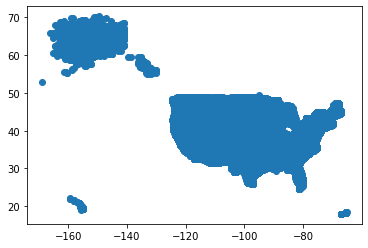

In [25]:
import csv
import matplotlib.pyplot as plt

fire_x = []
fire_y = []

with open('Data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        temp = row
        fire_x.append(temp[0])
        fire_y.append(temp[1])

plt.scatter(x=fire["LONGITUDE"], y=fire["LATITUDE"])
plt.show()

In [26]:
import os
files = os.listdir('Data_Files')
coor = []

for file in files:
    file = file.split('_')
    coor.append(str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N',''))))

In [27]:
new_data = []
for element in Data_csv_list:
    temp_ele = str(element[0])+','+str(element[1])
    if temp_ele not in coor:
        new_data.append(element)
print(len(new_data))

0


In [28]:
import csv
with open('Data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # spamwriter.writerow(['lat', 'long'])
    for val in new_data:
        spamwriter.writerow([val[0], val[1], val[2], val[3]])

In [10]:
import os
files = os.listdir('Data_Files')
file_list = []

for file_name in files:
    file = file_name.split('_')
    file_list.append([file_name, str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))])

In [38]:
import os
files = os.listdir('Fire_Files')
Fire_Files = {}

for file_name in files:
    file = file_name.split('_')
    location = str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))
    Fire_Files[location] = file_name

files = os.listdir('No_Fire_Files')
No_Fire_Files = {}

for file_name in files:
    file = file_name.split('_')
    location = str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))
    No_Fire_Files[location] = file_name

In [39]:
def get_dur(row):
    start_date_str = jd2cal(row.iloc[0]["DISCOVERY_DATE"])
    start_date_str = start_date_str + ' '
    start_date_str = start_date_str + str(row.iloc[0]["DISCOVERY_TIME"])
    # print(start_date_str)
    start_date = datetime.datetime.strptime(start_date_str, '%m/%d/%Y %H%M')

    end_date_str = jd2cal(row.iloc[0]["CONT_DATE"])
    end_date_str = end_date_str + ' '
    end_date_str = end_date_str + str(row.iloc[0]["CONT_TIME"])
    end_date = datetime.datetime.strptime(end_date_str, '%m/%d/%Y %H%M')
    diff = (end_date-start_date).total_seconds() / 3600.0
    return diff 
    # (end_date-start_date).astype('timedelta64[h]')

In [63]:
Data_final = pd.DataFrame()
index = 0

print(len(Dataset_list))

with open('dict.csv', 'w') as csv_file:  
    header = Dataset_list[0].columns.values.tolist()
    header.append("DUR")
    header.remove("LONG/LAT")
    for ind1 in range(0,400):
        header.append("T2M_"+str(ind1))
        header.append("RH2M_"+str(ind1))
        header.append("PS_"+str(ind1))
        header.append("WS10M_"+str(ind1))

    writer = csv.DictWriter(csv_file, fieldnames = header)
    writer.writeheader()
    for index, row in enumerate(Dataset_list):
        # print(index)
        # if(index == 0):
        #     writer.writerow(row.columns.values.tolist())
        Data_temp = {}
        Data_temp["LONGITUDE"] = row.iloc[0]["LONGITUDE"]
        Data_temp["LATITUDE"] = row.iloc[0]["LATITUDE"]
        Data_temp["DISCOVERY_DATE"] = jd2cal(row.iloc[0]["DISCOVERY_DATE"])
        Data_temp["DUR"] = get_dur(row)
        # print(Data_temp["DUR"])
        Data_temp["FIRE_SIZE"] = row.iloc[0]["FIRE_SIZE"]

        with open('Fire_Files/'+Fire_Files[row.iloc[0]["LONG/LAT"]], newline='') as csvfile1:
            spamreader = csv.reader(csvfile1, delimiter=',', quotechar='|')
            # print(Fire_Files[row.iloc[0]["LONG/LAT"]])
            for i in range(0,28):
                next(spamreader)
            for ind2,line in enumerate(spamreader):
                Data_temp["T2M_"+str(ind2)] = line[3]
                Data_temp["RH2M_"+str(ind2)] = line[11]
                Data_temp["PS_"+str(ind2)] = line[13]
                Data_temp["WS10M_"+str(ind2)] = line[14]

        # for key, value in Data_temp.items():
        #     writer.writerow([key, value])
        #Data_final.append(Data_temp,ignore_index=True)
        # Data_final = pd.concat([Data_final, pd.DataFrame(Data_temp,index=[0])], ignore_index=True)
        writer.writerow(Data_temp)

        Data_temp["DUR"] = 0
        Data_temp["FIRE_SIZE"] = 0
        Data_temp["DISCOVERY_DATE"] = jd2cal(row.iloc[0]['CONT_DATE']+90)
        with open('No_Fire_Files/'+No_Fire_Files[row.iloc[0]["LONG/LAT"]], newline='') as csvfile2:
            spamreader = csv.reader(csvfile2, delimiter=',', quotechar='|')
            for i in range(0,28):
                next(spamreader)
            for ind3,line in enumerate(spamreader):
                Data_temp["T2M_"+str(ind3)] = line[3]
                Data_temp["RH2M_"+str(ind3)] = line[11]
                Data_temp["PS_"+str(ind3)] = line[13]
                Data_temp["WS10M_"+str(ind3)] = line[14]

        # Data_final = pd.concat([Data_final, pd.DataFrame(Data_temp,index=[0])], ignore_index=True)
        # Data_final = Data_final.append(Data_temp,ignore_index=True)
        # for key, value in Data_temp.items():
        #     writer.writerow([key, value])
        writer.writerow(Data_temp)

        if(index%1000==0):
            print(index)

23798
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


In [65]:
Data_final.shape

(0, 0)

In [ ]:
Data_final.to_csv('Data_final.csv')

In [58]:
Data_final = pd.DataFrame()
row = df.loc[0]

Data_temp = {}
Data_temp["LONGITUDE"] = row["LONGITUDE"]
Data_temp["LATITUDE"] = row["LATITUDE"]
Data_temp["DISCOVERY_DATE"] = jd2cal(row["DISCOVERY_DATE"])
Data_temp["DUR"] = get_dur(row)
Data_temp["FIRE_SIZE"] = row["FIRE_SIZE"]

with open('Fire_Files/'+Fire_Files[row["LONG/LAT"]], newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i in range(0,28):
        next(spamreader)
    for index,line in enumerate(spamreader):
        Data_temp["T2M_"+str(index)] = line[3]
        Data_temp["RH2M_"+str(index)] = line[11]
        Data_temp["PS_"+str(index)] = line[13]
        Data_temp["WS10M_"+str(index)] = line[14]

Data_final = Data_final.append(Data_temp,ignore_index=True)

Data_temp["DUR"] = 0
Data_temp["FIRE_SIZE"] = 0
Data_temp["DISCOVERY_DATE"] = jd2cal(row['CONT_DATE']+90)
with open('No_Fire_Files/'+No_Fire_Files[row["LONG/LAT"]], newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i in range(0,28):
        next(spamreader)
    for index,line in enumerate(spamreader):
        Data_temp["T2M_"+str(index)] = line[3]
        Data_temp["RH2M_"+str(index)] = line[11]
        Data_temp["PS_"+str(index)] = line[13]
        Data_temp["WS10M_"+str(index)] = line[14]

Data_final = Data_final.append(Data_temp,ignore_index=True)
Data_final

,LONGITUDE,LATITUDE,DISCOVERY_DATE,DUR,FIRE_SIZE,T2M_0,RH2M_0,PS_0,WS10M_0,T2M_1,...,PS_4,WS10M_4,T2M_5,RH2M_5,PS_5,WS10M_5,T2M_6,RH2M_6,PS_6,WS10M_6
0,-121.005833,40.036944,02/02/2005,4.5,0.1,1.58,73.25,86.85,1.7,4.17,...,87.01,2.12,3.39,94.88,87.09,2.78,4.71,94.81,87.17,2.12
1,-121.005833,40.036944,05/03/2005,0.0,0.0,6.94,62.38,86.93,1.27,7.43,...,86.33,2.67,6.73,96.69,85.62,5.09,1.9,94.0,85.64,3.88


In [64]:
Data_final_csv = pd.read_csv('dict.csv')

In [65]:
Data_final_csv.head(10)

,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE,DUR,T2M_0,RH2M_0,...,PS_397,WS10M_397,T2M_398,RH2M_398,PS_398,WS10M_398,T2M_399,RH2M_399,PS_399,WS10M_399
0,-120.966667,40.144722,12/07/2015,NaN,NaN,NaN,0.1,0.500000,1.58,73.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-120.966667,40.144722,03/06/2016,NaN,NaN,NaN,0.0,0.000000,6.94,62.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-120.355278,38.868611,08/07/2014,NaN,NaN,NaN,0.1,3.000000,22.87,26.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-120.355278,38.868611,11/05/2014,NaN,NaN,NaN,0.0,0.000000,9.26,44.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-120.759600,39.024200,10/18/2015,NaN,NaN,NaN,0.1,4.600000,20.80,34.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-120.759600,39.024200,01/16/2016,NaN,NaN,NaN,0.0,0.000000,1.58,89.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-119.745833,38.595000,08/01/2015,NaN,NaN,NaN,0.1,5.750000,16.12,32.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-119.745833,38.595000,10/30/2015,NaN,NaN,NaN,0.0,0.000000,9.66,45.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-120.088611,38.485000,09/20/2015,NaN,NaN,NaN,0.5,9.716667,13.36,63.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-120.088611,38.485000,12/19/2015,NaN,NaN,NaN,0.0,0.000000,-2.83,98.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
Data_final_csv.to_csv('Data_final.csv')

In [69]:
header = []
header.append("DISCOVERY_TIME")
header.append("CONT_DATE")
header.append("CONT_TIME")
for ind1 in range(7,400):
    header.append("T2M_"+str(ind1))
    header.append("RH2M_"+str(ind1))
    header.append("PS_"+str(ind1))
    header.append("WS10M_"+str(ind1))

In [73]:
Data_final_csv=Data_final_csv.drop(header, axis=1)

In [80]:
Data_final_csv['DOY'] = ''
for index,row in Data_final_csv.iterrows():
    Data_final_csv.at[index,'DOY']= datetime.datetime.strptime(Data_final_csv.loc[index]['DISCOVERY_DATE'], '%m/%d/%Y').timetuple().tm_yday 

In [1]:
import sys


def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush()  # As suggested by Rom Ruben (see: http://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console/27871113#comment50529068_27871113)


In [7]:
import os
files = os.listdir('Data_Files_1')
W_Data_Dict = {}

for file_cnt,file_name in enumerate(files):
    file = file_name.split('_')
    location = str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))
    with open('Data_Files_1/'+file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        Data_temp = []
        for i in range(0,27):
            next(spamreader)
        for index,line in enumerate(spamreader):
            Data_temp.append([line[3],line[11],line[13],line[14]])
        W_Data_Dict[location] = Data_temp
    


0 15953
1 15953
2 15953
3 15953
4 15953
5 15953
6 15953
7 15953
8 15953
9 15953
10 15953
11 15953
12 15953
13 15953
14 15953
15 15953
16 15953
17 15953
18 15953
19 15953
20 15953
21 15953
22 15953
23 15953
24 15953
25 15953
26 15953
27 15953
28 15953
29 15953
30 15953
31 15953
32 15953
33 15953
34 15953
35 15953
36 15953
37 15953
38 15953
39 15953
40 15953
41 15953
42 15953
43 15953
44 15953
45 15953
46 15953
47 15953
48 15953
49 15953
50 15953
51 15953
52 15953
53 15953
54 15953
55 15953
56 15953
57 15953
58 15953
59 15953
60 15953
61 15953
62 15953
63 15953
64 15953
65 15953
66 15953
67 15953
68 15953
69 15953
70 15953
71 15953
72 15953
73 15953
74 15953
75 15953
76 15953
77 15953
78 15953
79 15953
80 15953
81 15953
82 15953
83 15953
84 15953
85 15953
86 15953
87 15953
88 15953
89 15953
90 15953
91 15953
92 15953
93 15953
94 15953
95 15953
96 15953
97 15953
98 15953
99 15953
100 15953
101 15953
102 15953
103 15953
104 15953
105 15953
106 15953
107 15953
108 15953
109 15953
110 15953


In [10]:
import pickle
import os
from fsplit.filesplit import Filesplit

if not os.path.exists("W_Data"):
    os.makedirs("W_Data")

with open('W_Data/W_Data_Dict.pickle', 'wb') as handle:
    pickle.dump(W_Data_Dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

fs = Filesplit()
def split_cb(f, s):
    print("file: {0}, size: {1}".format(f, s))
fs.split(file="W_Data/W_Data_Dict.pickle", split_size=50000000, output_dir="W_Data", callback=split_cb)
os.remove("W_Data/W_Data_Dict.pickle")

file: W_Data\W_Data_Dict_1.pickle, size: 50000000
file: W_Data\W_Data_Dict_2.pickle, size: 50000000
file: W_Data\W_Data_Dict_3.pickle, size: 50000000
file: W_Data\W_Data_Dict_4.pickle, size: 35157480
